## 텐서플로 2.0 소개
### Sequential API

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu',
               input_shape = (32, 32, 1)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32, 32, 100)       200       
_________________________________________________________________
dense_10 (Dense)             (None, 32, 32, 50)        5050      
_________________________________________________________________
dense_11 (Dense)             (None, 32, 32, 5)         255       
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


### 함수형 API

In [34]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape = (32, 32, 1))
x = Dense(units=100, activation = 'relu')(input_layer)
x = Dense(units=50, activation = 'relu')(x)

# x = Dense(units=100)(x)
# x = Activation('relu')(x)

output_layer = Dense(units=5, activation = 'softmax')(x)

model1 = Model(input_layer, output_layer)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
dense_12 (Dense)             (None, 32, 32, 100)       200       
_________________________________________________________________
dense_13 (Dense)             (None, 32, 32, 50)        5050      
_________________________________________________________________
dense_14 (Dense)             (None, 32, 32, 5)         255       
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


### 모형 compile

In [8]:
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])

### 모형 저장 및 불러오기

In [9]:
# h5 파일 포맷으로 저장
model.save('cnn_model.h5')

In [10]:
# 불러오기
from tensorflow.keras.models import load_model
cnn_model2 = load_model('cnn_model.h5')

## 분류 신경망 실습

### 랜덤 시드 설정

In [1]:
# 일관된 결과 값이 나오도록 함
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

### 데이터 불러오기

In [2]:
from sklearn import datasets
raw_wine = datasets.load_wine()

### 피처, 타깃 데이터 지정

In [3]:
X = raw_wine.data
y = raw_wine.target

### 피처 데이터 차원, 타깃 데이터 종류 확인

In [4]:
print("(data, features) : ", X.shape)
print(set(y))

(data, features) :  (178, 13)
{0, 1, 2}


### 타깃 데이터 원-핫 인코딩

In [5]:
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

### 트레이닝/테스트 데이터 분할

In [6]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state=0)

### 신경망 생성

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1]                   # 신경망에 사용되는 피처 개수를 저장
n_class = len(set(y))                    # 클래스 개수 저장
epo = 30

model = Sequential()
model.add(Dense(20, input_dim = n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


### 모형 컴파일

In [9]:
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

### 신경망 학습

In [10]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size=5)

Train on 133 samples
Epoch 1/30
133/133 [==============================] - 1s 5ms/sample - loss: 1.8539 - accuracy: 0.3835
Epoch 2/30
133/133 [==============================] - 0s 256us/sample - loss: 1.5996 - accuracy: 0.3985
Epoch 3/30
133/133 [==============================] - 0s 263us/sample - loss: 1.3056 - accuracy: 0.3534
Epoch 4/30
133/133 [==============================] - 0s 263us/sample - loss: 1.0861 - accuracy: 0.3910
Epoch 5/30
133/133 [==============================] - 0s 256us/sample - loss: 0.9303 - accuracy: 0.4737
Epoch 6/30
133/133 [==============================] - 0s 263us/sample - loss: 0.8378 - accuracy: 0.6241
Epoch 7/30
133/133 [==============================] - 0s 263us/sample - loss: 0.8117 - accuracy: 0.6241
Epoch 8/30
133/133 [==============================] - 0s 263us/sample - loss: 0.7908 - accuracy: 0.6090
Epoch 9/30
133/133 [==============================] - 0s 250us/sample - loss: 0.7725 - accuracy: 0.6165
Epoch 10/30
133/133 [========================

### 학습 평가

In [11]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

133/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### 정확도 및 손실 정도 시각화 준비

In [13]:
import numpy as np
epoch = np.arange(1, epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [14]:
accuracy = hist.history['accuracy']
print(accuracy)

[0.38345864, 0.39849624, 0.35338345, 0.39097744, 0.47368422, 0.62406015, 0.62406015, 0.60902256, 0.6165413, 0.6315789, 0.6315789, 0.71428573, 0.69924814, 0.7669173, 0.7218045, 0.83458644, 0.7819549, 0.8270677, 0.8120301, 0.7669173, 0.7969925, 0.84962404, 0.7894737, 0.8270677, 0.84962404, 0.83458644, 0.87218046, 0.8120301, 0.8270677, 0.86466163]


In [15]:
loss = hist.history['loss']
print(loss)

[1.8539354792214875, 1.5995953979348778, 1.3055668961732907, 1.0861314691995319, 0.9302657210737243, 0.8378271146824485, 0.811660359228464, 0.7907625898382717, 0.7725107586921606, 0.7598636134674674, 0.8249640061443013, 0.7002797709371811, 0.7944263927918628, 0.725481200935249, 0.7024984570374166, 0.5665542991985952, 0.621996892125983, 0.583277684405334, 0.6031928308924338, 0.613077204702492, 0.5810327174744212, 0.5826524980086133, 0.5615882456750798, 0.53387840013755, 0.4502817774401571, 0.48436081599920316, 0.4070402323303366, 0.5508983108334076, 0.5115865716584643, 0.4334486834984973]


### 정확도 학습 그래프

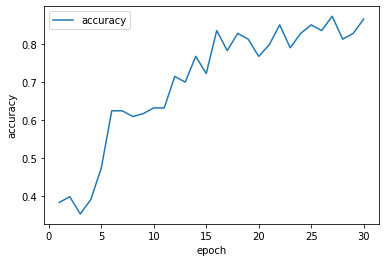

In [16]:
import matplotlib.pyplot as plt
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### 손실 그래프

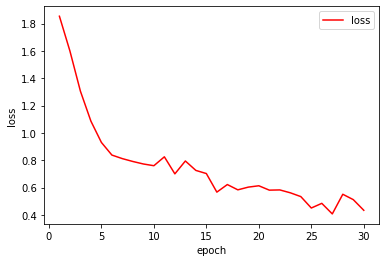

In [17]:
import matplotlib.pyplot as plt
plt.plot(epoch, loss, 'r', label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 회귀 신경망 실습

### 랜덤 시드 설정

In [18]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

### 데이터 불러오기

In [20]:
from sklearn import datasets
raw_boston = datasets.load_boston()

### 피처, 타깃 데이터 지정

In [21]:
X = raw_boston.data
y = raw_boston.target

### 피처 데이터 차원, 타깃 데이터 종류 확인

In [22]:
print(X.shape)

(506, 13)


In [23]:
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

### 트레이닝/테스트 데이터 분할

In [24]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

### 신경망 생성

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim = n_feat, activation = 'relu'))
model.add(Dense(1))

### 모형 컴파일

In [28]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = ['mean_squared_error'])

### 신경망 학습

In [29]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)

Train on 379 samples
Epoch 1/30
379/379 [==============================] - 0s 958us/sample - loss: 479.8058 - mean_squared_error: 479.8058
Epoch 2/30
379/379 [==============================] - 0s 208us/sample - loss: 96.0528 - mean_squared_error: 96.0527
Epoch 3/30
379/379 [==============================] - 0s 210us/sample - loss: 86.8360 - mean_squared_error: 86.8360
Epoch 4/30
379/379 [==============================] - 0s 204us/sample - loss: 67.8890 - mean_squared_error: 67.8890
Epoch 5/30
379/379 [==============================] - 0s 204us/sample - loss: 59.9239 - mean_squared_error: 59.9239
Epoch 6/30
379/379 [==============================] - 0s 207us/sample - loss: 54.8727 - mean_squared_error: 54.8727
Epoch 7/30
379/379 [==============================] - 0s 207us/sample - loss: 50.7333 - mean_squared_error: 50.7333
Epoch 8/30
379/379 [==============================] - 0s 208us/sample - loss: 46.8916 - mean_squared_error: 46.8916
Epoch 9/30
379/379 [=============================

### 모형 평가

In [30]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

379/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

31.356752
127/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### 시각화 준비 과정

In [32]:
import numpy as np
epoch = np.arange(1, epo + 1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [33]:
mse = hist.history['mean_squared_error']
print(mse)

[479.80582, 96.05275, 86.83599, 67.88903, 59.92392, 54.872726, 50.733334, 46.891605, 47.91315, 42.544987, 46.03134, 38.955406, 36.924923, 35.15177, 35.911556, 34.05242, 37.505554, 34.232033, 35.76808, 33.896606, 36.52996, 35.129063, 35.66745, 33.191166, 35.46431, 33.68179, 31.919054, 33.435787, 32.629005, 33.58113]


In [35]:
loss = hist.history['loss']
print(loss)

[479.8057891724921, 96.05276863430295, 86.83599813003339, 67.8890343816425, 59.9239087205449, 54.87273698117299, 50.733341237171345, 46.89160451599665, 47.91315160137368, 42.54497977784567, 46.031340047363244, 38.95540370224019, 36.92492445037359, 35.15176932100885, 35.911559134485856, 34.052418857262445, 37.50555559135679, 34.2320348411248, 35.76807752888561, 33.89661338335606, 36.52996005860985, 35.12906224746503, 35.66744688444213, 33.19116699475412, 35.46430729435742, 33.68178953816205, 31.919055327261972, 33.43578224642925, 32.62900313978774, 33.58113577183444]


### MSE 학습 그래프

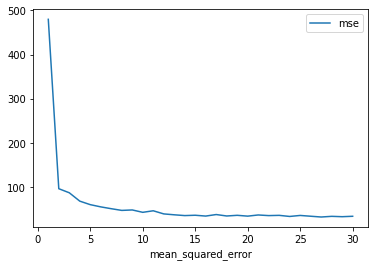

In [36]:
import matplotlib.pyplot as plt
plt.plot(epoch, mse, label='mse')
plt.xlabel('mean_squared_error')
plt.legend()
plt.show()

### 손실 학습 그래프

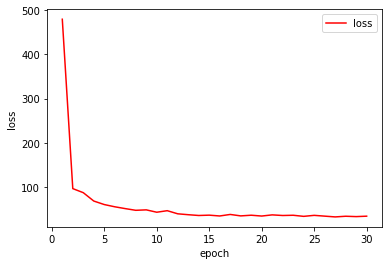

In [37]:
import matplotlib.pyplot as plt
plt.plot(epoch,loss, 'r', label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### 실제값, 예측값 데이터 프레임 생성

In [38]:
pred_y = model.predict(X_te).flatten()
print(pred_y)

[18.382832  21.890337  29.210135  12.314684  18.406872  23.431126
 15.859535  24.914831  16.141886   9.294696   6.7170815 11.368488
 14.627799   6.7244773 36.676723  27.281343  17.97384   34.2865
 27.691458  24.287592  25.912405  20.210974  19.433868  30.029924
 23.936972  13.367836  20.504663  13.566305  31.31195   18.665377
 14.9331455 17.152182  21.314695  23.944914  27.90721   17.056541
  8.352982  21.03223    8.759733  10.108026  25.138039  21.402199
 16.385046  13.820709  20.497738  26.67551   19.269619  17.562687
 11.200668  23.877743   9.191819  14.153724  22.068832  26.003172
 10.400229  18.73908   21.041758  13.189089  16.599367  21.043016
 20.823235  21.807455  28.818836  27.226244  13.31085   28.460651
 15.756354  17.360281  11.365095  23.319921  19.143528  20.96789
 31.664627  28.25146   21.217918   2.9079304 30.178116  23.352217
 25.98124   19.857761  26.331224  20.775368  18.789385  31.618542
 31.320967  24.926342  23.204046   6.5281205 27.674667  13.214585
 14.547601   

In [40]:
import pandas as pd
res_df = pd.DataFrame(pred_y, columns = ['predict_val'])
res_df['real_val'] = y_te           # 새로운 열 추가
res_df.head(3)

,predict_val,real_val
0,18.382832,22.6
1,21.890337,50.0
2,29.210135,23.0


In [41]:
df_sort = res_df.sort_values(["predict_val"], ascending=True)      # 오름차순 정렬
df_sort.head(3)

,predict_val,real_val
116,-2.027545,8.4
96,1.121558,13.8
106,1.388740,10.4


### 예측값, 실제값 그래프

<function matplotlib.pyplot.show(close=None, block=None)>

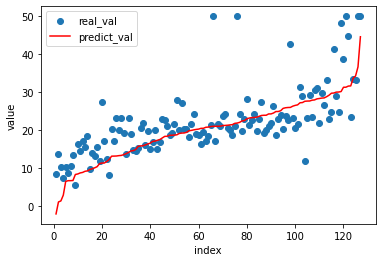

In [43]:
import matplotlib.pyplot as plt
import numpy as np
idx = np.arange(1, len(df_sort) + 1)       # x 축 설정
plt.scatter(idx, df_sort['real_val'], marker = 'o', label = 'real_val')      # 스케터 플롯 생성
plt.plot(idx, df_sort['predict_val'], color = 'r', label = 'predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show